In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as az

In [2]:
sns.set()

Probabilistic model:
\begin{align}
 \theta & \sim \rm{Beta}(a, b) \\
 y & \sim \rm{Binom}(n, \theta)
\end{align}


In [3]:
a = 20 # prior: parameter a
b = 10 # prior: parameter b
n = 50 # likelihood: number of tosses
y_obs = 10 # likelihood: number of HEADs observed. (Fixed in this example. It could be sampled form a binomial instead)
sigma = 0.1 # proposal standard deviation
theta_0 = 0.5 # a lucky guess...
N = 50_000 # chain length

In [6]:
# Approach 1: compute the posterior in closed-form (if you can...)

exact_post_fun = lambda theta: stats.beta.pdf(theta, a+y_obs, b+n-y_obs) # exact posterior

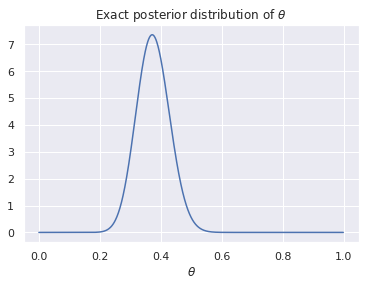

In [7]:
dtheta = 1e-3
theta_vec = np.arange(0, 1, dtheta)
plt.plot(theta_vec, exact_post_fun(theta_vec))
plt.xlabel(r"$\theta$");
plt.title(r"Exact posterior distribution of $\theta$");

In [8]:
with pm.Model():
    theta = pm.Beta("theta", alpha=a, beta=b)
    y = pm.Binomial("y", n=n, p=theta, observed=y_obs)
    trace = pm.sample(1000, random_seed=123)


/tmp/ipykernel_87315/231311962.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [9]:
az.summary(trace)

/home/marco/anaconda3/envs/bda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.373,0.052,0.281,0.474,0.001,0.001,1673.0,2533.0,1.0


/home/marco/anaconda3/envs/bda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


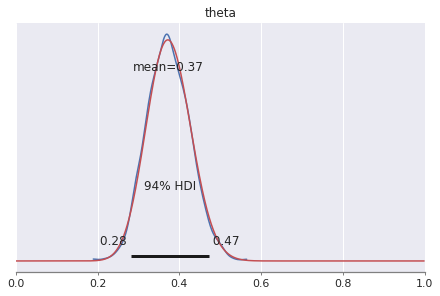

In [10]:
az.plot_posterior(trace)
plt.plot(theta_vec, exact_post_fun(theta_vec), "r", label="exact")
plt.xlim([0,1]);

(0.0, 1.0)

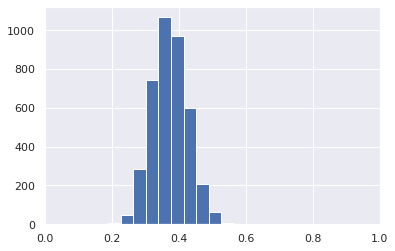

In [13]:
plt.hist(trace.get_values("theta"));
plt.xlim([0, 1.0])